### Problem 1. Bus Lines (#Probability)

#### Part 1
To find the probability that bus B comes before bus A, we should use the law of total probability for continuous random variables. First, we should define the random variables, using a uniform distribution between 0 and 10 for the arrival time of company A's bus, as we do not know what time it will arrive (we have no reason to prefer a certain time), and the latest bus A would arrive is in 10 minutes.\
$A \sim  Uniform(0, 10)$\
$B \sim  Expo(1/10)$

Then, we can apply the law of total probability to integrate over all possibilities where the value of the random variable A is less than the random variable B to obtain a probability.\
$P(B<A) = \int_0^{10} P(B<A|A=a)f_A(a) \, da$\
$f_A(a) = 1/(10-0) = 1/10$\
$P(B<A) = 1/10\int_0^{10} P(B<a|A=a) \, da$\
$P(B<A) = 1/10\int_0^{10} FB(a) \, da$\
$P(B<A) = 1/10\int_0^{10} 1-e^{-a/10} \, da$\
$P(B<A) = 1/10 ((10+10e^{-10/10})-(0+10e^{-0/10})) = 1/e = 0.368$

#### Part 2
We can first define a random variable (T) for the waiting time of Maria, with time 0 being defined as the time she arrives at the bus stop. We can use this to find the CDF of the time Maria arrives. For Maria to be waiting for longer than a given time, both bus A and bus B must arrive after the time. We can convert this intersection statement into the product of both A and B arriving after the time due to the independence of bus A and bus B arrival times. We can then input the CDFs of the uniform and exponential distributions.\
$T = min(A,B)$\
$FT(t) = P(T\le t) = 1 - P(T>t) = 1 - P(A>t, B>t) = 1 - P(A>t)P(B>t)$\
$FT(t) = 1 - (1-P(A\le t))(1-P(B\le t)) = 1 - (1-FA(t)(1-FB(t)))$\
$FT(t) = 1 - (1-(1-e^{-t/10}))(1-(t-0)/(10-0)) = 1-e^{-t/10}(1-t/10)$

To find the PDF from the CDF, we can differentiate. The support of the distribution is between 0 and 10 because the waiting time of Maria cannot be smaller than 0 (the time she arrives), or greater than 10 (as a bus must have arrived by this point).\
$fT(t) = d/dt FT(t) = d/dt 1-e^{-t/10}(1-t/10)$\
$fT(t) = e^{-t/10}/10 + e^{-t/10}/10 - te^{-t/10}/100$\
$fT(t) = e^{-t/10}(1/5 - t/100)$\
$for: 0<t<10$

#### Part 3

Experimental probability of bus B arriving first: 0.36877
Theoretical probability of bus B arriving first: 0.368


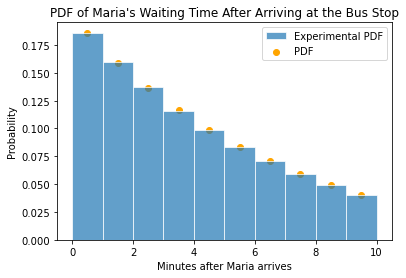

In [96]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# generate random samples from distributions
trials = 100000
a = sts.uniform(0, 10).rvs(trials)
b = sts.expon(scale=10).rvs(trials)
b_first = 0
t = []

for i in range(trials):
    
    # compare arrival times for each pair and add first bus arrival time to list t
    if a[i]>b[i]:
        b_first += 1
        t.append(b[i])
    else:
        t.append(a[i])

print('Experimental probability of bus B arriving first:', b_first/trials)
print('Theoretical probability of bus B arriving first:', 0.368)

# plot comparison between theoretical and experimental PDFs
x = np.arange(0.5, 10.5, 1)
y = [np.exp(-i/10)*(1/5-i/100) for i in x]
plt.hist(t, density=True, label='Experimental PDF', edgecolor='white', alpha = 0.7)
plt.scatter(x, y, label='PDF', color='orange')
plt.title("PDF of Maria's Waiting Time After Arriving at the Bus Stop")
plt.xlabel('Minutes after Maria arrives')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Problem 2. Counting Votes (#Distributions)

#### Part 1
We can first define X and Y as the number of votes for and against the proposal, with D being their difference.\
$X \sim number\ of\ votes\ for$\
$Y \sim number\ of\ votes\ against$\
$D \sim difference\ in\ votes$\
$N \sim Poisson(\lambda)$

Because the total number of votes is given by N, we know that X+Y must be equal to N. We can model the number of votes for and against using a binomial distribution because: we assume votes are independent, a vote is either for or against (binary outcome), and the probability of a vote being for remains p (constant). We can say that the number of total votes (trials) is equal to n (a value from the poisson distribution), and thus create distributions of X and Y given that the total number of votes is a particular value.\
$X+Y=N$\
$X|N=n \sim Binomial(n,p)$\
$Y|N=n \sim Binomial(n,1-p)$

To get the probability than X takes a specific value x and Y takes a specific value y, we can use the discrete law of total probability, summing over all possible values of n. Because x+y must equal n, there are only certain values of x, y, and n which will have a non-zero probability. We can thus replace n with x+y such that this constraint is met, and remove the sum. Because X and Y follow the same distribution, we need only keep one. We then substitute the binomial and poisson distributions with the given parameters into the equation.\
$P(X=x,Y=y)=\sum_{n=0}^\inf P(X=x,Y=y|N=n)P(N=n)$\
$P(X=x,Y=y)=P(X=x,Y=y|N=x+y)P(N=x+y)=P(X=x|N=x+y)P(N=x+y)$\
$P(X=x,Y=y)={x+y\choose x}p^x(1-p)^y \cdot e^{-\lambda}\lambda^{x+y}/(x+y)!$\
$P(X=x,Y=y)=e^{-\lambda p}(\lambda p)^x/x! \cdot e^{-\lambda (1-p)}(\lambda (1-p))^y/y!$

Because we are able to separate the distribution above into the product of 2 poisson distributions, we can not only define the distributions of X and Y, but also conclude that they are independent.\
$P(X=x,Y=y) = P(X=x)P(Y=y) \therefore {X \newcommand{\indep}{\perp \!\!\! \perp} \indep Y}$\
$X \sim Poisson(\lambda p)$\
$Y \sim Poisson(\lambda (1-p))$

To find the expected value of the difference in votes, we can use linearity to separate this into the difference between the expeect number of votes for and the expect number of votes against. Using the poisson distribution, we see that the expected value is equal to the rate parameter.\
$E(D) = E(X-Y) = E(X) - E(Y) = \lambda p - \lambda (1-p) = \lambda(2p-1)$

To find the variance, of the difference in votes, we can use the equation below. We know that E(XY) is equal to the product of E(X) and E(Y) becaue of the independence of X and Y, and therefore that covariance between the 2 variables is 0. Using the poisson distribution, we see that variance is again equal to the rate parameter, and thus we can just find the sum of the rate parameters of X and Y.\
$Var(D) = Var(X-Y) = Var(X) + Var(Y) - 2Cov(X,Y)$\
$Cov(X,Y) = E(XY)-E(X)E(Y) = E(X)E(Y) - E(X)E(Y) = 0$\
$Var(D) = Var(X) + Var(Y) = \lambda p + \lambda (1-p) = \lambda$

#### Part 2

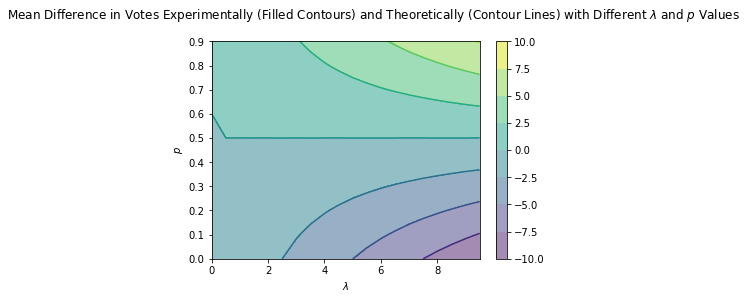

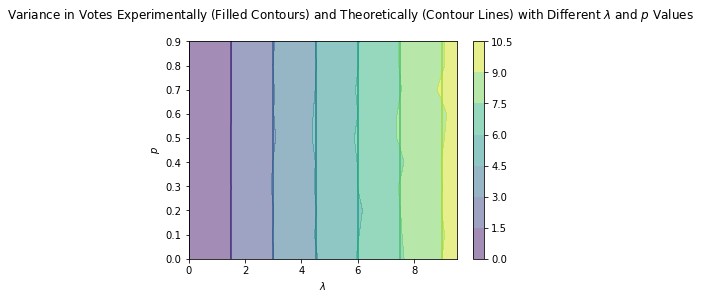

In [215]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

# range of values for both lambda and probability
lambda1 = np.arange(0, 10, 0.5)
prob = np.arange(0, 1, 0.1)

trials = 10000

# empty nested lists for means and variances
means = [[0 for _ in range(len(lambda1))] for _ in range(len(prob))]
variances = [[0 for _ in range(len(lambda1))] for _ in range(len(prob))]

# iterate over lambda and prob lists
for l in range(len(lambda1)):
    for p in range(len(prob)):
        differences = []
        voters = sts.poisson(lambda1[l]).rvs(trials)
        
        for i in voters:
            votes_for = 0
            votes_against = 0
            
            for j in range(i):
                if np.random.uniform() < prob[p]:
                    votes_for += 1
                else:
                    votes_against += 1
    
            differences.append(votes_for - votes_against)
        
        # fill mean and variance lists
        means[p][l] = np.mean(differences)
        variances[p][l] = np.var(differences)

# plot comparison between theoretical and experimental means and variances
lambda1, prob = np.meshgrid(lambda1, prob)
plt.contourf(lambda1, prob, means, alpha=0.5)
plt.colorbar()
plt.contour(lambda1, prob, lambda1*(2*prob-1))
plt.suptitle('Mean Difference in Votes Experimentally (Filled Contours) and Theoretically (Contour Lines) with Different $\lambda$ and $p$ Values', y=1)
plt.xlabel('$\lambda$')
plt.ylabel('$p$')
plt.show()

plt.contourf(lambda1, prob, variances, alpha=0.5)
plt.colorbar()
plt.contour(lambda1, prob, lambda1)
plt.suptitle('Variance in Votes Experimentally (Filled Contours) and Theoretically (Contour Lines) with Different $\lambda$ and $p$ Values', y=1)
plt.xlabel('$\lambda$')
plt.ylabel('$p$')
plt.show()

### Problem 3. Hereditary Heights (#Probability)

#### Part 1
First, we can find the probability of one child being taller than both parents. Because all children and parent heights follow identical  distributions, and are independent, the probability of one child being taller than both parents is simply 1/3. To get the average number of children being taller than both parents, we can multiply this by 4 (by linearity), the number of children in the family.\
$Ia: child\ taller\ than\ both\ parents$\
$C: number\ of\ children\ taller\ than\ both\ parents$\
$E(Ia) = P(a) = 1/3$\
$E(C) = E(nIa) = nE(Ia) = 4*1/3 = 4/3$

#### Part 2
Since both the child's and mother's heights follow normal distributions, the distribution of the difference between their heights can also be given by a normal distribution. First, we define the random variable D, which denotes the distribution of differences between the heights of the mother and of a child.\
$D: difference\ between\ child\ and\ mothers's\ height$\
$D = Y_j-X_1$

To find the mean, we can subtract the distribution means from each other. Because the marginal distributions are the same, the mean of the difference will be 0. The standard deviation will be given by the formula below, which has been calculated using convolution integrals, and encorporates the correlation between $X_1$ and $Y_j$.\
$\mu_{Y_j-X_1} = \mu_{Y_j}-\mu_{X_1} = \mu-\mu = 0$\
$\sigma_{Y_j-X_1} = \sqrt{\sigma^2_{X_1}+\sigma^2_{Y_j}-2\rho\sigma_{X_1}\sigma_{Y_j}} = \sqrt{2\sigma^2-2\rho\sigma^2} = \sigma\sqrt{2(1-\rho)}$\
$Y_j-X_1 \sim Normal(0, (\sigma\sqrt{2(1-\rho)})^2)$

Using the transformation formula from the normal distribution of the difference in height, to the standard normal distribution CDF, we can determine the probability that child $Y_j$ is at least 1cm taller than the mother. Here, we take the compliment of the probability that the child is less than 1cm taller (as this is the CDF definition).\
$Z = (X-\mu)/\sigma$\
$P(D\ge 1) = 1-P(D\le 1) = 1-\Phi(1/(\sigma\sqrt{2(1-\rho)}))$

Finally, as there are 4 children, we should multiply this probability by 4. We are able to do this because the marginal distributions of all 4 children are identical, and share the same correlation with the mother.\
$N: children\ at\ least\ 1cm\ taller\ than\ mother$\
$E(N) = 4(1-\Phi(1/(\sigma\sqrt{2(1-\rho)})))$

### Problem 4. Radioactive Decay (#ParameterEstimation)

#### Part 1
To find a best estimate for lambda, we can use frequentist parameter estimation. To do this, we simply take the formula for the maximum likelihood estimate of the exponential distribution. We divide the number of values by their sum.
${\widehat {\lambda }}_{mle} = n/(\Sigma_i x_i) = 6/(1.5+2+3.1+4.2+5.1+11.9) = 0.216$

#### Part 2
To calculate the upper and lower bounds for lambda, we can use the equations below. Here, we use 1.96 standard deviations surrounding the mean in each direction to obtain lower and upper bound estimates.
$\lambda_{lower} = {\widehat {\lambda }}_{mle}(1-1.96/\sqrt{n}) = 0.216(1-1.96/\sqrt{n}) = 0.0431$\
$\lambda_{upper} = {\widehat {\lambda }}_{mle}(1+1.96/\sqrt{n}) = 0.216(1+1.96/\sqrt{n}) = 0.389$

Because this formula is generally valid for sample sizes of at least 15, we can determine if the estimate is decent using plots. By plotting the distribution of data and the exponential distributions produced by the lower bound, upper bound, and MLE, we can  qualitatively judge how likely it is that we could have drawn the data from the distributions. I have chosen to display the data as scatter points rather than a histogram as there are so few data points (<20). This means each bin on a histogram might not accurately represent the distribution of data. 

Though it is difficult to determine from the plot how likely the data points are to 

Rate: 0.2158273381294964
Scale: 4.633333333333334
Rate interval: [0.04312950014909966, 0.3885251761098932]
Scale interval: [23.18598630967151, 2.5738357807658594]


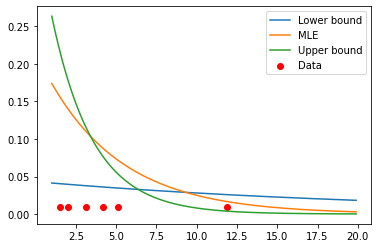

In [241]:
x = [1.5, 2.0, 3.1, 4.2, 5.1, 11.9]

mle = len(x)/sum(x)
lower = mle*(1-1.96/(len(x)**0.5))
upper = mle*(1+1.96/(len(x)**0.5))

print('Rate:', mle)
print('Scale:', 1/mle)
print('Rate interval:', [lower, upper])
print('Scale interval:', [1/lower, 1/upper])
    
p = np.arange(1, 20, 0.1)
plt.plot(p, sts.expon(scale=1/lower).pdf(p), label='Lower bound')
plt.plot(p, sts.expon(scale=1/mle).pdf(p), label = 'MLE')
plt.plot(p, sts.expon(scale=1/upper).pdf(p), label='Upper bound')
plt.scatter(x, [0.01]*len(x), c='red', label='Data')
plt.legend()
plt.()
plt.show()

### References
Wikimedia Foundation. (2022, March 8). Exponential distribution. Wikipedia. Retrieved April 13, 2022, from https://en.wikipedia.org/wiki/Exponential_distribution 

Wikimedia Foundation. (2022, March 30). Poisson distribution. Wikipedia. Retrieved April 15, 2022, from https://en.wikipedia.org/wiki/Poisson_distribution 

#### CHECK CITATIONS
#### CHECK IMPORTS- DONT NEED MULTIPLE